# Make sure to install the necessary libraries before running the code
- pip install numpy pandas requests mysql-connector-python


In [1]:
# Import required libraries
import csv
import numpy as np
import pandas as pd
import os
import requests
import mysql.connector
from datetime import datetime, timedelta

In [2]:
def download_file(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as file:
        file.write(response.content)


In [3]:
if __name__ == "__main__":
    # Download CSV file
    file_url = "https://stooq.pl/q/d/l/?s=eurpln&i=d"
    current_directory = os.getcwd()
    destination_path = os.path.join(current_directory, "eurpln_d.csv")
    download_file(file_url, destination_path)
    print(f"File was saved as {destination_path}")


File was saved as C:\Users\48575\jupyter_netbook_curs\portfolio\euro\eurpln_d.csv


# Read CSV file into a DataFrame

In [4]:
df = pd.read_csv(destination_path, encoding='latin-1', sep=',')

In [5]:
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,1984-09-24,0.00920,0.00920,0.00920,0.00920
1,1984-10-01,0.00940,0.00940,0.00940,0.00940
2,1984-10-08,0.00920,0.00920,0.00920,0.00920
3,1984-10-15,0.00920,0.00920,0.00920,0.00920
4,1984-10-22,0.00900,0.00900,0.00900,0.00900
...,...,...,...,...,...
8814,2024-01-29,4.36933,4.37366,4.36140,4.36678
8815,2024-01-30,4.36655,4.37484,4.34660,4.35111
8816,2024-01-31,4.35164,4.35792,4.32497,4.32943
8817,2024-02-01,4.32938,4.34322,4.30683,4.31583


# Perform data manipulations

In [6]:
# creating colums (DzienTygodnia	SkrotDzienTygodnia	Month	Short_Month)
df['Data'] = pd.to_datetime(df['Data'])
df['DzienTygodnia'] = df['Data'].apply(lambda date: date.strftime('%A'))
df['SkrotDzienTygodnia'] = df['DzienTygodnia'].str[:3]
df['Month'] = df['Data'].dt.strftime('%B')
df['Short_Month'] = df['Month'].str[:3]
df = df.sort_values(by='Data', ascending=False)

In [7]:
#creating colum mean 
df['mean'] = df[['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie']].mean(axis=1)

In [8]:

df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=False)

# count mean from last 30 days
end_date_30 = df['Data'].iloc[0]
start_date_30 = end_date_30 - timedelta(days=29)

last_30_days = df[(df['Data'] >= start_date_30) & (df['Data'] <= end_date_30)]
average_closing_price_30 = last_30_days['Zamkniecie'].mean()

# count mean from last 60 days
end_date_60 = df['Data'].iloc[0]
start_date_60 = end_date_60 - timedelta(days=59)

last_60_days = df[(df['Data'] >= start_date_60) & (df['Data'] <= end_date_60)]
average_closing_price_60 = last_60_days['Zamkniecie'].mean()
# count mean from last 60 days
end_date_90 = df['Data'].iloc[0]
start_date_90 = end_date_90 - timedelta(days=89)

last_90_days = df[(df['Data'] >= start_date_90) & (df['Data'] <= end_date_90)]
average_closing_price_90 = last_90_days['Zamkniecie'].mean()

# adding data
df.loc[df.index[0], 'Srednia_30_dni'] = average_closing_price_30
df.loc[df.index[0], 'Srednia_60_dni'] = average_closing_price_60
df.loc[df.index[0], 'Srednia_90_dni'] = average_closing_price_90
# finding max_val from colum Zamkniecie and insert into new colum
half_year_ago = datetime.now() - timedelta(days=365 / 2)
df['max_val_6_month'] = df['Data'] > half_year_ago
last_half_year_df = df[df['max_val_6_month']]
max_value_last_half_year = last_half_year_df['Zamkniecie'].max()
df.loc[df.index[0], 'max_val_6_month'] = max_value_last_half_year

In [9]:
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,DzienTygodnia,SkrotDzienTygodnia,Month,Short_Month,mean,Srednia_30_dni,Srednia_60_dni,Srednia_90_dni,max_val_6_month
8818,2024-02-02,4.31585,4.31731,4.31502,4.31588,Friday,Fri,February,Feb,4.316015,4.358099,4.345829,4.358238,4.66104
8817,2024-02-01,4.32938,4.34322,4.30683,4.31583,Thursday,Thu,February,Feb,4.323815,NaN,NaN,NaN,True
8816,2024-01-31,4.35164,4.35792,4.32497,4.32943,Wednesday,Wed,January,Jan,4.340990,NaN,NaN,NaN,True
8815,2024-01-30,4.36655,4.37484,4.34660,4.35111,Tuesday,Tue,January,Jan,4.359775,NaN,NaN,NaN,True
8814,2024-01-29,4.36933,4.37366,4.36140,4.36678,Monday,Mon,January,Jan,4.367793,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1984-10-22,0.00900,0.00900,0.00900,0.00900,Monday,Mon,October,Oct,0.009000,NaN,NaN,NaN,False
3,1984-10-15,0.00920,0.00920,0.00920,0.00920,Monday,Mon,October,Oct,0.009200,NaN,NaN,NaN,False
2,1984-10-08,0.00920,0.00920,0.00920,0.00920,Monday,Mon,October,Oct,0.009200,NaN,NaN,NaN,False
1,1984-10-01,0.00940,0.00940,0.00940,0.00940,Monday,Mon,October,Oct,0.009400,NaN,NaN,NaN,False


# Describe the DataFrame

In [10]:
des = df.describe().transpose()
print(des)

                 count                           mean                  min  \
Data              8819  2006-11-07 16:34:04.313414144  1984-09-24 00:00:00   
Otwarcie        8819.0                       3.701753                0.009   
Najwyzszy       8819.0                       3.714493                0.009   
Najnizszy       8819.0                       3.690578                0.009   
Zamkniecie      8819.0                       3.701975                0.009   
mean            8819.0                       3.702199                0.009   
Srednia_30_dni     1.0                       4.358099             4.358099   
Srednia_60_dni     1.0                       4.345829             4.345829   
Srednia_90_dni     1.0                       4.358238             4.358238   

                                25%                  50%                  75%  \
Data            1998-05-11 12:00:00  2006-12-07 00:00:00  2015-07-23 12:00:00   
Otwarcie                    3.58235               4.0791 

# Check missing values

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

Data                     0
Otwarcie                 0
Najwyzszy                0
Najnizszy                0
Zamkniecie               0
DzienTygodnia            0
SkrotDzienTygodnia       0
Month                    0
Short_Month              0
mean                     0
Srednia_30_dni        8818
Srednia_60_dni        8818
Srednia_90_dni        8818
max_val_6_month          0
dtype: int64


# Check data types
be sure u have same types of data in ur sql 

In [12]:
data_types = df.dtypes
print(data_types)


Data                  datetime64[ns]
Otwarcie                     float64
Najwyzszy                    float64
Najnizszy                    float64
Zamkniecie                   float64
DzienTygodnia                 object
SkrotDzienTygodnia            object
Month                         object
Short_Month                   object
mean                         float64
Srednia_30_dni               float64
Srednia_60_dni               float64
Srednia_90_dni               float64
max_val_6_month               object
dtype: object


# Export DataFrame to a text file

In [13]:
y = [tuple(row) for row in df.to_records(index=False)]
with open('file_import.txt', 'w') as file:
        for row_tuple in y:
            file.write(str(row_tuple) + ',\n')


# Connect to MySQL database
- Host: [**Your Host IP**]
- Port:port 2 connect
- User: root
- Password: [**Your Password**] (or No password if empty)
- Database: Name of database

In [14]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    password='',
    database='Euro'
)

In [15]:
cursor = conn.cursor()

# Truncate existing table
- (Name of ur table in data_base)

In [16]:
cursor.execute("TRUNCATE TABLE euro_kurs")

# Prepare and execute SQL INSERT statement
- make sure u have same numbers of columns - %s 

In [17]:
sql = "INSERT INTO euro_kurs VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

# Execute the SQL statement using your MySQL connection

In [18]:
for row_tuple in y:
    # Convert datetime64 to native Python datetime
    row_tuple = tuple(
        pd.to_datetime(val).to_pydatetime() if isinstance(val, np.datetime64) else val
        if not isinstance(val, (np.float64, np.int64)) else float(val)
        for val in row_tuple
    )
    cursor.execute(sql, row_tuple)

# Commit the changes to the database


In [19]:
conn.commit()

# Close the cursor and connection


In [20]:
cursor.close()
conn.close()

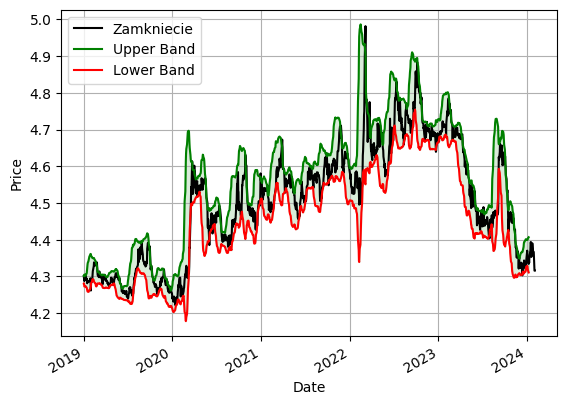

In [21]:
import matplotlib.pyplot as plt

# Przykładowe dane
# (Zakładam, że masz już wczytany DataFrame df z odpowiednimi danymi.)
std_dev = df['Zamkniecie'].rolling(window=20).std()
sma = df['Zamkniecie'].rolling(window=20).mean()

lower_band = sma - 2 * std_dev
lower_band = lower_band.rename("lower band")

upper_band = sma + 2 * std_dev
upper_band = upper_band.rename("upper band")

# Convert Series to DataFrame and add suffixes to column names
upper_band_df = upper_band.to_frame()
upper_band_df.columns = [f"{col}_upper" for col in upper_band_df.columns]

lower_band_df = lower_band.to_frame()
lower_band_df.columns = [f"{col}_lower" for col in lower_band_df.columns]

# Create a copy of df to avoid modifying the original DataFrame
df_copy = df.copy()

df_copy = df_copy.join(upper_band_df).join(lower_band_df)

# set data from 2019 
start_date = '2019-01-01'
end_date = df_copy['Data'].max()
df_copy = df_copy[(df_copy['Data'] >= start_date) & (df_copy['Data'] <= end_date)]

ax = df_copy.plot(x='Data', y='Zamkniecie', label='Zamkniecie', color='black')
ax.plot(df_copy['Data'], df_copy['upper band_upper'], label='Upper Band', color='green')
ax.plot(df_copy['Data'], df_copy['lower band_lower'], label='Lower Band', color='red')

ax.fill_between(df_copy['Data'], df_copy['lower band_lower'], df_copy['upper band_upper'], color='g', alpha=0.15)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid()
ax.legend()

plt.show(block=True)

